Шаг 1. Я написала телеграм-бота, способного реагировать на пройстейшие вопросы. 

Шаг 2. Научу моего бота знакомиться с человеком и запонимать его ФИО, возраст, номер телефона, почту и адресс для доставки товаров. 

Шаг 3. Выкину из датасета все непонятные товары и разделю все на 5 категорий: для пола, для стен, двери, ковры, аксессуары. 
В аксессуары попадает все, что не может явно отностись к предыдушим 4.
PS: я не особо разбираюсь, и возможно что-то, что используют при ремонте стен попало в полы и тп. Новый датасет, из которого я выкинула все, с чем не работает бот, находится в таблице с названием DataSet_forbot

Шаг 4. Пишу чат-бота для telegram. Этот бот собирает информацию о пользователе, выдает ее ему на проверку. Основная задача бота - подсказывать товары в требуемых пользователю типе и ценовой категории товара. 
PS: название выбиралось исключительно на основании того, о чем датасет

Ссылка на бота: @stroitelworldskills_bot \
Токен бота: #1553844540:AAEslNcUTcBhm_H6vlHn_YZs1WU1wQem0UU


Бот создавался про помощи библиотеки telebot. Код бота представлен в конце отчета. Пример работы бота находится ниже. 

Демонстрация работы бота

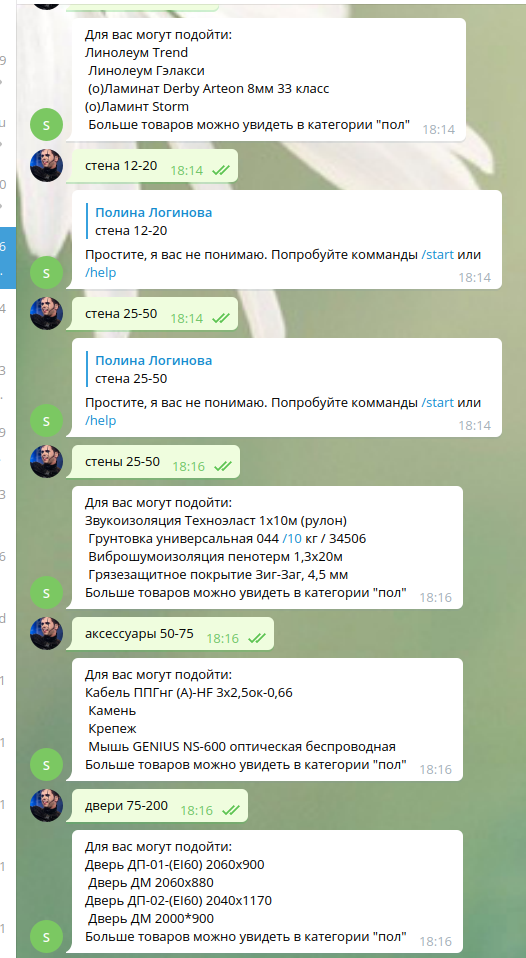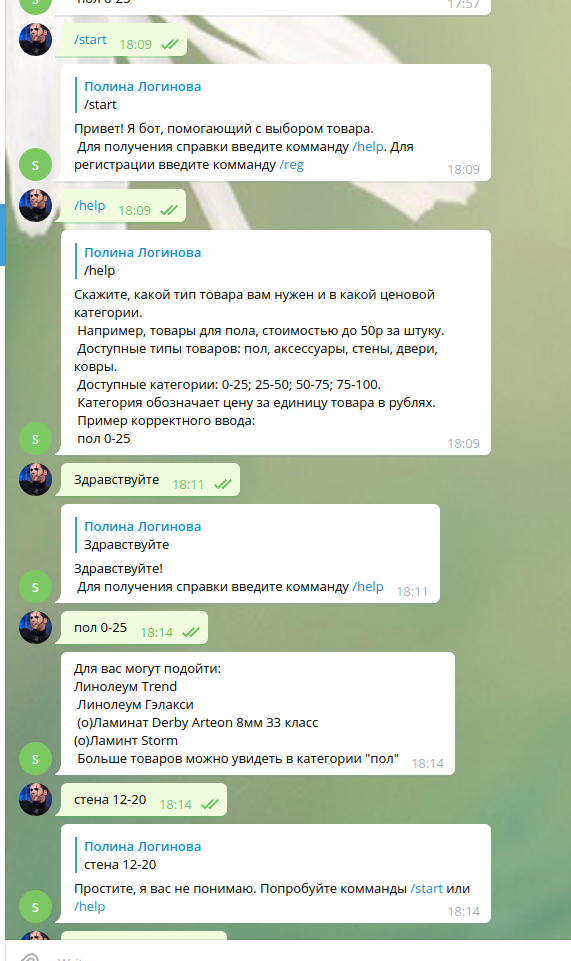

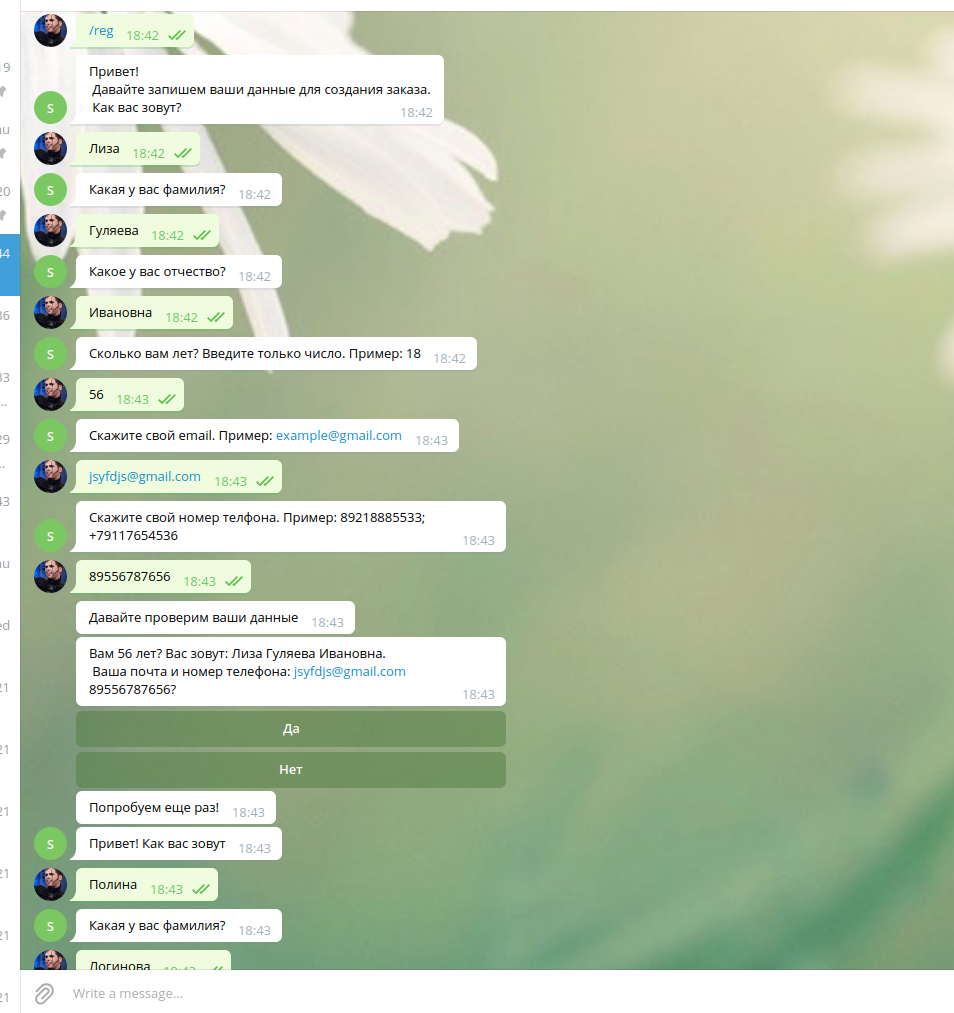

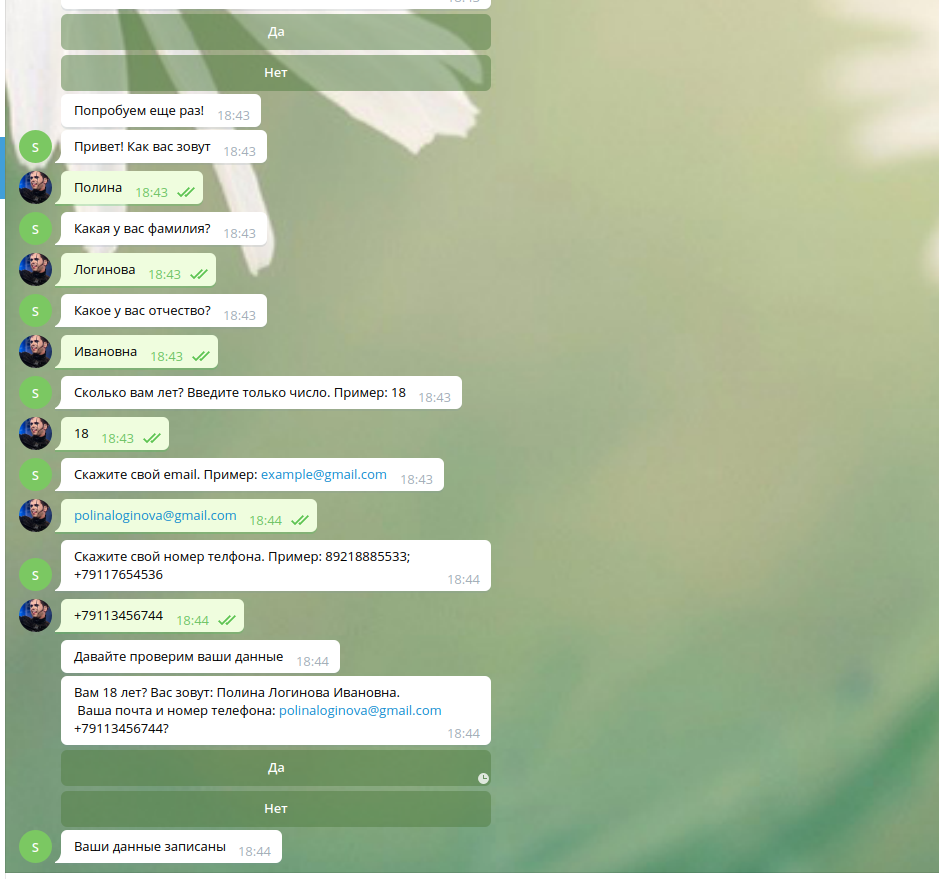

In [ ]:
import telebot
from telebot import types
import pandas as pd
import numpy as np

df = pd.read_excel('DataSet_forbot.xlsx')
df.columns = ['numder', 'name', 'price', 'tipe', 'category' ]
tovarname = df['name'].to_list()
print(tovarname)

name = ''
surname = ''
secondname = ''#ака отчество
email = ''
age = 0
phonenumder = ''

#1553844540:AAEslNcUTcBhm_H6vlHn_YZs1WU1wQem0UU

bot = telebot.TeleBot("1553844540:AAEslNcUTcBhm_H6vlHn_YZs1WU1wQem0UU")

@bot.message_handler(commands=['start'])
def send_welcome(message):
	bot.reply_to(message, "Привет! Я бот, помогающий с выбором товара. Для получения справки введите комманду /help. Для регистрации введите комманду /reg")

@bot.message_handler(commands=['help'])
def send_welcome(message):
	bot.reply_to(message, "Скажите, какой тип товара вам нужен и в какой ценовой категории. Например, товары для пола, стоимостью до 50р за штуку. Доступные типы товаров: пол, аксессуары, стены, двери, ковры. Доступные категории: 0-25; 25-50; 50-75; 75-100. Категория обозначает цену за единицу товара в рублях")

@bot.message_handler(func=lambda message: True)
def echo_all(message):
    global tovarname
    if message.text == 'Привет' or message.text == 'здравствуйте' or message.text == 'привет' or message.text == 'Здравтвуйте!'  or message.text == 'Здравтвуйте' or message.text == 'здравтвуйте!' or message.text == 'привет!' or message.text == 'Привет' or or message.text == 'прiвет!' or message.text == 'Привіт':
	    bot.reply_to(message, 'Здравствуйте! Для получения справки введите комманду /help')
    elif message.text == 'Ты кто' or message.text == 'ты кто' or message.text == 'Кто ты' or message.text == 'кто ты':
        bot.reply_to(message, 'Привет! Я бот, потогающий с выбором. Для получения справки введите комманду /help')
    elif message.text == '/reg': #регистрация пользователя
        bot.send_message(message.from_user.id, "Привет! Давайте запишем ваши данные для создания заказа. Как вас зовут?")
        bot.register_next_step_handler(message, reg_name)
    elif message.text == 'пол 0-25':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[790]) + ' '+ str(tovarname[791]) + ' ' +  str(tovarname[792]) + ' ' + str(tovarname[793]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'пол 25-50':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[846]) + ' '+ str(tovarname[847]) + ' ' +  str(tovarname[848]) + ' ' + str(tovarname[849]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'пол 50-75':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[895]) + ' '+ str(tovarname[896]) + ' ' +  str(tovarname[897]) + ' ' + str(tovarname[898]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'пол 75-200':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[945]) + ' '+ str(tovarname[946]) + ' ' +  str(tovarname[947]) + ' ' + str(tovarname[948]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'аксессуары 0-25':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[0]) + ' '+ str(tovarname[1]) + ' ' +  str(tovarname[2]) + ' ' + str(tovarname[3]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'аксессуары 25-50':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[88]) + ' '+ str(tovarname[89]) + ' ' +  str(tovarname[90]) + ' ' + str(tovarname[91]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'аксессуары 50-75':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[159]) + ' '+ str(tovarname[160]) + ' ' +  str(tovarname[161]) + ' ' + str(tovarname[162]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'аксессуары 75-200':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[262]) + ' '+ str(tovarname[263]) + ' ' +  str(tovarname[264]) + ' ' + str(tovarname[265]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'двери 0-25':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[350]) + ' '+ str(tovarname[351]) + ' ' +  str(tovarname[352]) + ' ' + str(tovarname[353]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'двери 25-50':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[367]) + ' '+ str(tovarname[368]) + ' ' +  str(tovarname[369]) + ' ' + str(tovarname[370]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'двери 50-75':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[385]) + ' '+ str(tovarname[386]) + ' ' +  str(tovarname[387]) + ' ' + str(tovarname[388]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'двери 75-200':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[405]) + ' '+ str(tovarname[406]) + ' ' +  str(tovarname[407]) + ' ' + str(tovarname[408]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'стены 0-25':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[1005]) + ' '+ str(tovarname[1006]) + ' ' +  str(tovarname[1007]) + ' ' + str(tovarname[1008]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'стены 25-50':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[1013]) + ' '+ str(tovarname[1014]) + ' ' +  str(tovarname[1015]) + ' ' + str(tovarname[1016]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'стены 50-75':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[1018]) + ' '+ str(tovarname[1019]) + ' ' +  str(tovarname[1020]) + ' ' + str(tovarname[1021]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'стены 75-200':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[1025]) + ' '+ str(tovarname[1026]) + ' ' +  str(tovarname[1027]) + ' ' + str(tovarname[1028]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'ковры 0-25':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[432]) + ' '+ str(tovarname[433]) + ' ' +  str(tovarname[434]) + ' ' + str(tovarname[435]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'ковры 25-50':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подоbot.reply_to(message, message.text)йти: " + str(tovarname[527]) + ' '+ str(tovarname[528]) + ' ' +  str(tovarname[529]) + ' ' + str(tovarname[530]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'ковры 50-75':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[608]) + ' '+ str(tovarname[609]) + ' ' +  str(tovarname[610]) + ' ' + str(tovarname[611]) + 'Больше товаров можно увидеть в категории "пол"')

    elif message.text == 'ковры 75-200':
        #global tovarname
        bot.send_message(message.from_user.id, "Для вас могут подойти: " + str(tovarname[703]) + ' '+ str(tovarname[704]) + ' ' +  str(tovarname[705]) + ' ' + str(tovarname[706]) + 'Больше товаров можно увидеть в категории "пол"')

    else: bot.reply_to(message, 'Простите, я вас не понимаю. Попробуйте комманды /start или /help')

def reg_name(message):
    global name
    name = message.text
    bot.send_message(message.from_user.id, "Какая у вас фамилия?")
    bot.register_next_step_handler(message, reg_surname)

def reg_surname(message):
    global surname
    surname = message.text
    bot.send_message(message.from_user.id, "Какое у вас отчество?")
    bot.register_next_step_handler(message, reg_secondname)

def reg_secondname(message):
    global secondname
    secondname = message.text
    bot.send_message(message.from_user.id, "Сколько вам лет? Введите только число. Пример: 18")
    bot.register_next_step_handler(message, reg_age)

def reg_age(message):
    global age
    age = message.text
    bot.send_message(message.from_user.id, "Скажите свой email. Пример: example@gmail.com")
    bot.register_next_step_handler(message, reg_email)

def reg_email(message):
    global email
    email = message.text
    bot.send_message(message.from_user.id, "Скажите свой номер телфона. Пример: 89218885533; +79117654536")
    bot.register_next_step_handler(message, reg_phonenumber)

def reg_phonenumber(message):
    global phonenumder
    phonenumder = message.text
    bot.send_message(message.from_user.id, "Давайте проверим ваши данные")


    keyboard = types.InlineKeyboardMarkup()
    key_yes = types.InlineKeyboardButton(text='Да', callback_data='yes')
    keyboard.add(key_yes)
    key_no = types.InlineKeyboardButton(text='Нет', callback_data='no')
    keyboard.add(key_no)
    question = 'Вам ' + str(age) + ' лет? Вас зовут: ' + name + ' ' + surname + ' ' + secondname + '. Ваша почта и номер телефона: ' + email + ' ' + phonenumder + '?'
    bot.send_message(message.from_user.id, text=question, reply_markup=keyboard)


@bot.callback_query_handler(func=lambda call: True)
def callback_worker(call):
    if call.data == "yes":
        bot.send_message(call.message.chat.id, "Ваши данные записаны")
    elif call.data == "no":
        bot.send_message(call.message.chat.id, "Попробуем еще раз!")
        bot.send_message(call.message.chat.id, "Привет! Как вас зовут")
        bot.register_next_step_handler(call.message, reg_name)

bot.polling()